In [1]:
import tensorflow as tf 
import numpy as np 
from matplotlib import pyplot as plt 

In [2]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        loss = logs["loss"]
        if loss <= self.threshold:
            self.model.stop_training = True


In [4]:
epoch_loss = []

class LogEpochLoss(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        epoch_loss.append(logs["loss"])

In [6]:
from tensorflow.keras.datasets import mnist 

In [36]:
(trainX, trainy), (testX, testy) = mnist.load_data()

X = trainX
y = trainy

y = tf.keras.utils.to_categorical(y)


print(X.shape)

X = np.expand_dims(X, axis=-1)

X = tf.image.resize(X,  [32,32]) 

print("X size:", X.shape)
print("Y size:", y.shape)

input_shape = X[0].shape
input_shape = input_shape + (1,)

(60000, 28, 28)
X size: (60000, 32, 32, 1)
Y size: (60000, 10)


In [43]:
base_model = tf.keras.applications.EfficientNetB0(input_shape = (32, 32, 1), include_top = False, weights = None )

In [46]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 1000, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1, 1, 1280)       4048991   
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 1000)              1281000   
                                                                 
 dense_5 (Dense)             (None, 10)                10010     
                                                                 
Total params: 5,340,001
Trainable params: 5,297,982
Non-trainable params: 42,019
_________________________________________________________________


In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs = 10, batch_size = 40, verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 121s 78ms/step - loss: 0.1937 - accuracy: 0.9506
Epoch 2/10
1500/1500 [==============================] - 117s 78ms/step - loss: 0.0975 - accuracy: 0.9750
Epoch 3/10
1500/1500 [==============================] - 119s 80ms/step - loss: 0.1061 - accuracy: 0.9726
Epoch 4/10
1500/1500 [==============================] - 127s 85ms/step - loss: 0.1054 - accuracy: 0.9737
Epoch 5/10
1500/1500 [==============================] - 127s 84ms/step - loss: 0.0686 - accuracy: 0.9823
Epoch 6/10
1500/1500 [==============================] - 119s 80ms/step - loss: 0.0957 - accuracy: 0.9742
Epoch 7/10
1500/1500 [==============================] - 139s 93ms/step - loss: 0.0951 - accuracy: 0.9749
Epoch 8/10
1500/1500 [==============================] - 124s 83ms/step - loss: 0.0697 - accuracy: 0.9819
Epoch 9/10
1500/1500 [==============================] - 129s 86ms/step - loss: 0.0553 - accuracy: 0.9849
Epoch 10/10
1500/1500 [==============================] 

In [52]:
base_model.trainable = False 

In [54]:
base_model.save_weights('models/')

In [55]:
unit_range = np.arange(1000, 100000, 1000)

In [62]:
model = tf.keras.models.Sequential([ 
    base_model,
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(units = 1000, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])
model.summary()

print(np.shape(model.layers[3].get_weights()[0]))


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1, 1, 1280)       4048991   
                                                                 
 flatten_9 (Flatten)         (None, 1280)              0         
                                                                 
 dense_17 (Dense)            (None, 1000)              1281000   
                                                                 
 dense_18 (Dense)            (None, 10)                10010     
                                                                 
Total params: 5,340,001
Trainable params: 1,291,010
Non-trainable params: 4,048,991
_________________________________________________________________
(1000, 10)


In [64]:
initial_weights_1 = []
initial_weights_2 = []
final_weights_1 = []
final_weights_2 = []

In [66]:


for units in unit_range:
    model = tf.keras.models.Sequential([ 
        base_model,
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(units = units, activation = 'relu'),
        tf.keras.layers.Dense(units = 10, activation = 'softmax')
    ])
    initial_weights_1.append(model.layers[2].get_weights()[0])
    initial_weights_2.append(model.layers[3].get_weights()[0])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X, y, epochs = 5, batch_size = 40,  verbose = 1)

    final_weights_1.append(model.layers[2].get_weights()[0])
    final_weights_2.append(model.layers[3].get_weights()[0])




Epoch 1/5
1500/1500 [==============================] - 33s 21ms/step - loss: 0.0265 - accuracy: 0.9942
Epoch 2/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0182 - accuracy: 0.9949
Epoch 3/5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0190 - accuracy: 0.9955
Epoch 4/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0164 - accuracy: 0.9956
Epoch 5/5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0157 - accuracy: 0.9956
Epoch 1/5
1500/1500 [==============================] - 38s 24ms/step - loss: 0.0257 - accuracy: 0.9940
Epoch 2/5
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0192 - accuracy: 0.9949
Epoch 3/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0181 - accuracy: 0.9952
Epoch 4/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0171 - accuracy: 0.9955
Epoch 5/5
1500/1500 [==============================] - 36s 24ms/step - lo

KeyboardInterrupt: 

In [67]:
diff_weights_1 = []
diff_weights_2 = []

for i in range(len(initial_weights_1) - 1):
    diff_weights_1.append(final_weights_1[i] - initial_weights_1[i])
    diff_weights_2.append(final_weights_2[i] - initial_weights_2[i])


In [68]:
diff_weights_1_avg = []
diff_weights_2_avg = []

diff_weights_avg_sum = []

for i in range(len(diff_weights_1)):
    diff_weights_1_flat = np.ndarray.flatten(diff_weights_1[i])
    diff_weights_2_flat = np.ndarray.flatten(diff_weights_2[i])

    diff_weights_1_abs = np.abs(diff_weights_1_flat)
    diff_weights_2_abs = np.abs(diff_weights_2_flat)

    diff_weights_1_avg.append(np.average(diff_weights_1_abs))
    diff_weights_2_avg.append(np.average(diff_weights_2_abs))

    diff_weights_avg_sum.append(diff_weights_1_avg + diff_weights_2_avg)

In [70]:
diff_weights_avg_sum = []
for i in range(len(diff_weights_1)):
    diff_weights_avg_sum.append(diff_weights_1_avg[i] + diff_weights_2_avg[i])

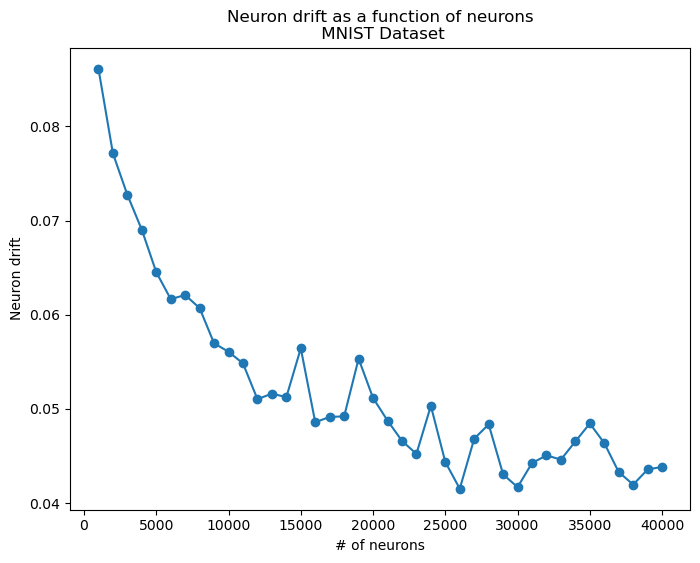

In [71]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(unit_range[0:40], diff_weights_avg_sum, linestyle = '-', marker = 'o')

ax.set_title("Neuron drift as a function of neurons\n MNIST Dataset")
ax.set_ylabel("Neuron drift")
ax.set_xlabel("# of neurons")

plt.show()

In [72]:
import pickle
weights = {"initial weights 1": initial_weights_1, "final weights 1": final_weights_1,
           "initial weights 2": initial_weights_2, "final weights 2": final_weights_2}
pickle.dump(weights, open( "data_mnist_60000.pkl", "wb" ) )

In [73]:
import pickle
data = pickle.load(open("results/data_mnist_60000.pkl", "rb"))
initial_1 = np.array(data["initial weights 1"])
final_1 = np.array(data["final weights 1"])
initial_2 = np.array(data["initial weights 2"])
final_2 = np.array(data["final weights 2"])

In [74]:
size = len(final_2)
print(size)

40


In [75]:
print(type(final_2))

<class 'list'>


In [96]:
import numpy as np
norms = []
for i in range(size):
    # Compute Frobenius norm between A and B
    fro_norm_1 = np.linalg.norm(initial_1[i]-final_1[i])
    fro_norm_2 = np.linalg.norm(initial_2[i]-final_2[i])
    fro_norm = fro_norm_1 + fro_norm_2
    norms.append(fro_norm)
print(len(norms))

40


In [98]:
import math
count = 0
unit_range = np.arange(1000, 100000, 1000)
unit_range = unit_range[0:40]
for units in unit_range:
    norms[count] = math.sqrt(norms[count] / (units ** 2))
    count = count + 1

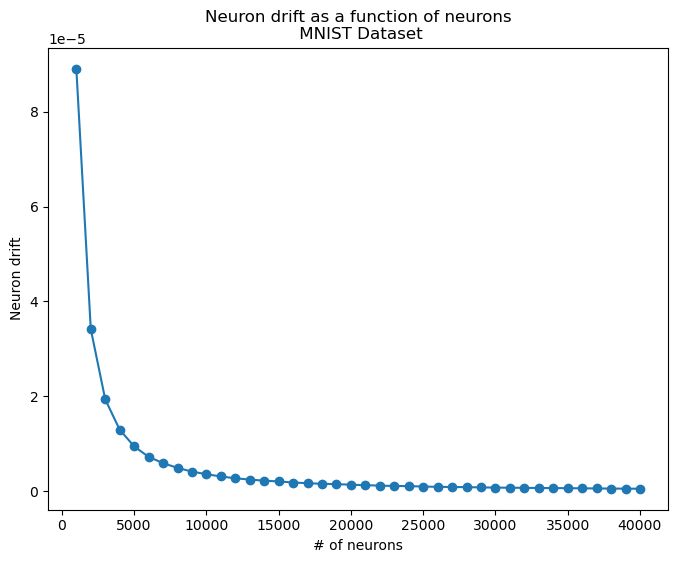

In [99]:
import matplotlib.pyplot as plt

# set the size of the figure
fig, ax = plt.subplots(figsize=(8, 6))
# create the plot
ax.plot(unit_range, norms, linestyle='-', marker='o')

# set the title and axis labels
ax.set_title("Neuron drift as a function of neurons\n MNIST Dataset")
ax.set_ylabel("Neuron drift")
ax.set_xlabel("# of neurons")


# display the plot
plt.show()